In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
data = pd.read_csv(f'../data/raw/data.csv')

In [3]:
data.columns

Index(['age', 'gender', 'chronic_conditions', 'previous_hospitalizations',
       'mental_health_issues', 'polypharmacy', 'nutritional_status',
       'follow_up_completed', 'care_plan_adherence', 'staffing_level',
       'family_involvement', 'hospital_acquired_infections',
       'discharge_timing', 'readmitted_within_30_days', 'admission_date'],
      dtype='object')

In [4]:
data.head()

,age,gender,chronic_conditions,previous_hospitalizations,mental_health_issues,polypharmacy,nutritional_status,follow_up_completed,care_plan_adherence,staffing_level,family_involvement,hospital_acquired_infections,discharge_timing,readmitted_within_30_days,admission_date
0,93.0,Female,NaN,8.0,No,Yes,NaN,No,High,Adequate,Active,Yes,Weekday,0,2023-09-28
1,79.0,Female,2.0,7.0,Yes,Yes,NaN,Yes,High,Adequate,Moderate,No,Weekday,0,2023-07-30
2,72.0,Female,0.0,NaN,No,No,Good,Yes,High,Adequate,Moderate,No,Weekend,0,2023-03-12
3,85.0,Male,NaN,5.0,No,Yes,Poor,No,NaN,Adequate,Inactive,No,Weekday,0,2023-05-15
4,NaN,Male,NaN,3.0,No,No,Moderate,Yes,High,Adequate,Moderate,No,Weekend,1,2023-10-30


In [5]:
df = data.copy()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   age                           700000 non-null   float64
 1   gender                        1000000 non-null  object 
 2   chronic_conditions            700000 non-null   float64
 3   previous_hospitalizations     700000 non-null   float64
 4   mental_health_issues          1000000 non-null  object 
 5   polypharmacy                  1000000 non-null  object 
 6   nutritional_status            700000 non-null   object 
 7   follow_up_completed           1000000 non-null  object 
 8   care_plan_adherence           700000 non-null   object 
 9   staffing_level                1000000 non-null  object 
 10  family_involvement            1000000 non-null  object 
 11  hospital_acquired_infections  1000000 non-null  object 
 12  discharge_timing             

In [7]:
data['admission_date'] = pd.to_datetime(data['admission_date'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   age                           700000 non-null   float64       
 1   gender                        1000000 non-null  object        
 2   chronic_conditions            700000 non-null   float64       
 3   previous_hospitalizations     700000 non-null   float64       
 4   mental_health_issues          1000000 non-null  object        
 5   polypharmacy                  1000000 non-null  object        
 6   nutritional_status            700000 non-null   object        
 7   follow_up_completed           1000000 non-null  object        
 8   care_plan_adherence           700000 non-null   object        
 9   staffing_level                1000000 non-null  object        
 10  family_involvement            1000000 non-null  object        
 11 

In [9]:
data.head()

,age,gender,chronic_conditions,previous_hospitalizations,mental_health_issues,polypharmacy,nutritional_status,follow_up_completed,care_plan_adherence,staffing_level,family_involvement,hospital_acquired_infections,discharge_timing,readmitted_within_30_days,admission_date
0,93.0,Female,NaN,8.0,No,Yes,NaN,No,High,Adequate,Active,Yes,Weekday,0,2023-09-28
1,79.0,Female,2.0,7.0,Yes,Yes,NaN,Yes,High,Adequate,Moderate,No,Weekday,0,2023-07-30
2,72.0,Female,0.0,NaN,No,No,Good,Yes,High,Adequate,Moderate,No,Weekend,0,2023-03-12
3,85.0,Male,NaN,5.0,No,Yes,Poor,No,NaN,Adequate,Inactive,No,Weekday,0,2023-05-15
4,NaN,Male,NaN,3.0,No,No,Moderate,Yes,High,Adequate,Moderate,No,Weekend,1,2023-10-30


In [10]:
data['admission_date']

0        2023-09-28
1        2023-07-30
2        2023-03-12
3        2023-05-15
4        2023-10-30
            ...    
999995   2023-09-14
999996   2023-06-19
999997   2023-04-16
999998   2023-12-17
999999   2023-08-08
Name: admission_date, Length: 1000000, dtype: datetime64[ns]

In [11]:
data.dtypes

age                                    float64
gender                                  object
chronic_conditions                     float64
previous_hospitalizations              float64
mental_health_issues                    object
polypharmacy                            object
nutritional_status                      object
follow_up_completed                     object
care_plan_adherence                     object
staffing_level                          object
family_involvement                      object
hospital_acquired_infections            object
discharge_timing                        object
readmitted_within_30_days                int64
admission_date                  datetime64[ns]
dtype: object

In [12]:
num_cols = [col for col in data.columns if data[col].dtype in ['int64', 'float64'] and data[col].nunique() >= 20 and col != 'resident_id' ]
cat_cols = [col for col in data.columns if data[col].dtype == 'object']
dis_cols = [col for col in data.columns if data[col].dtype in ['int64', 'float64'] and data[col].nunique() <= 20 and col != 'readmitted_within_30_days']
date_col = [col for col in data.columns if data[col].dtype == 'datetime64[ns]']


In [13]:
num_cols ; cat_cols ; dis_cols ; date_col

['admission_date']

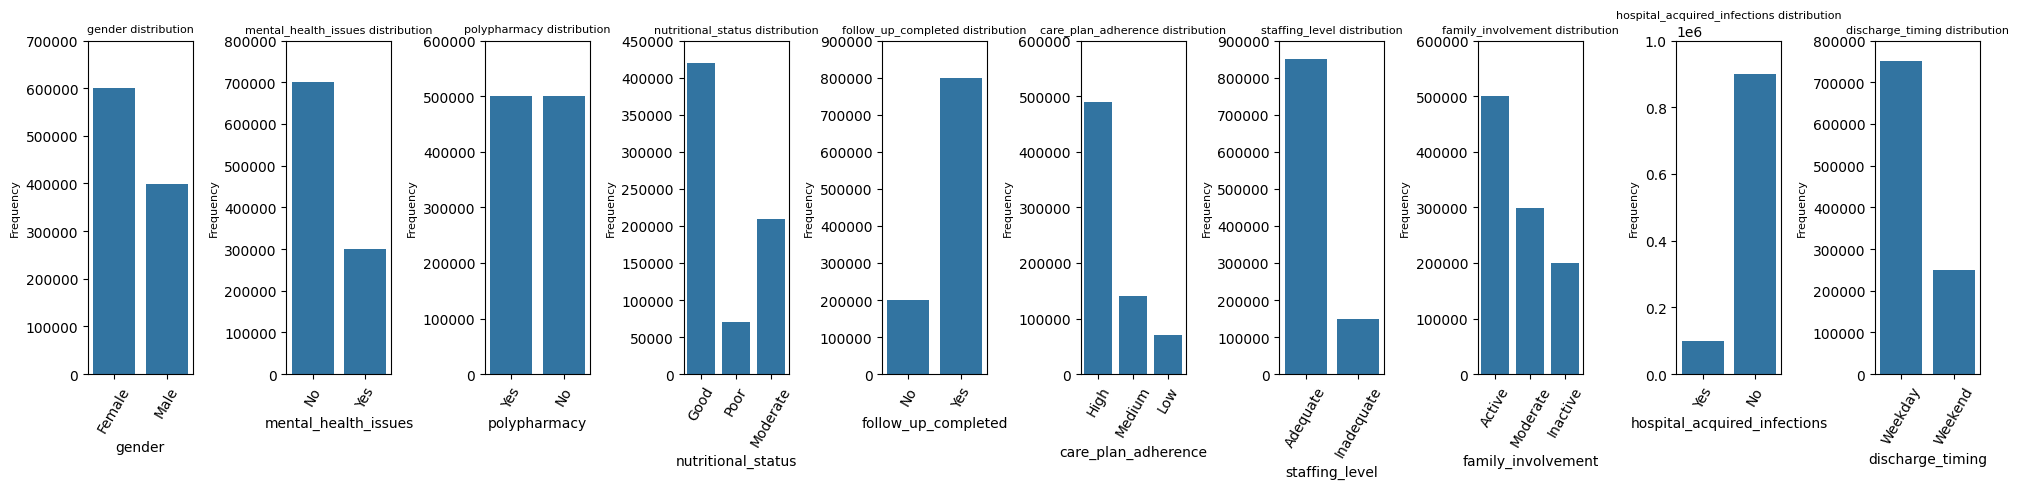

In [14]:
fig, ax = plt.subplots(nrows = 1, ncols=len(cat_cols), figsize = (20, 5))
for id, col in enumerate(cat_cols):
    sns.countplot(x = col, data=data, ax=ax[id])
    ax[id].set_yticks(ax[id].get_yticks())
    ax[id].tick_params(axis='y', labelsize=10)
    ax[id].tick_params(axis='x', labelsize=10, rotation=60)
    ax[id].set_title(f'{col} distribution', fontsize=8)
    ax[id].set_ylabel('Frequency', fontsize=8)

plt.tight_layout()

In [15]:
data[cat_cols].isna().sum()

gender                               0
mental_health_issues                 0
polypharmacy                         0
nutritional_status              300000
follow_up_completed                  0
care_plan_adherence             300000
staffing_level                       0
family_involvement                   0
hospital_acquired_infections         0
discharge_timing                     0
dtype: int64

In [16]:
for col in cat_cols:
    modal_val = data[col].mode()[0]
    data[col] = data[col].fillna(modal_val)

In [17]:
data['gender'].value_counts()[1]

/var/folders/kf/yv1zrfvd701c47vqp5xz4sjh0000gn/T/ipykernel_85165/1383423425.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['gender'].value_counts()[1]


np.int64(399803)

In [18]:
# Initialize an empty dictionary to store the encoding mappings for categorical columns
encoding = {}

# Loop through each categorical column in the dataset
for col in cat_cols:
    # Get the normalized value counts of the categorical column, sorted in descending order
    val_counts = data[col].value_counts(normalize=True, ascending=False).items()
    # Create an encoding dictionary for the column, mapping each category to an index starting from 1
    encoding[col] = {category: idx for idx, (category, _) in enumerate(val_counts, 0)}
    # Map the categories in the column to the corresponding indices
    data[col] = data[col].map(encoding[col])

In [19]:
data[cat_cols].head()

,gender,mental_health_issues,polypharmacy,nutritional_status,follow_up_completed,care_plan_adherence,staffing_level,family_involvement,hospital_acquired_infections,discharge_timing
0,0,0,1,0,1,0,0,0,1,0
1,0,1,1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,1
3,1,0,1,2,1,0,0,2,0,0
4,1,0,0,1,0,0,0,1,0,1


Text(0.5, 1.0, 'Age Distribution of Residents')

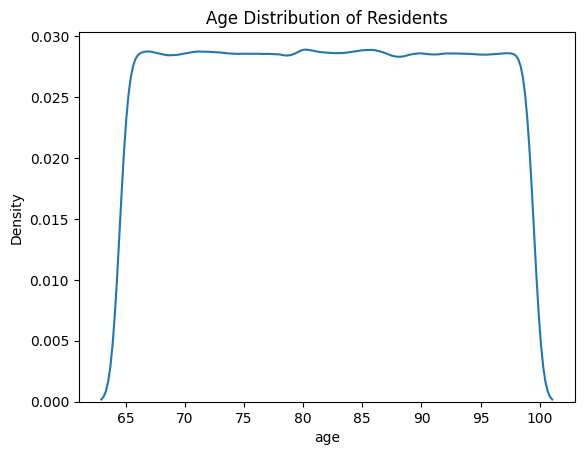

In [20]:
sns.kdeplot(x = 'age', data= data)
plt.title('Age Distribution of Residents')

<Axes: xlabel='age'>

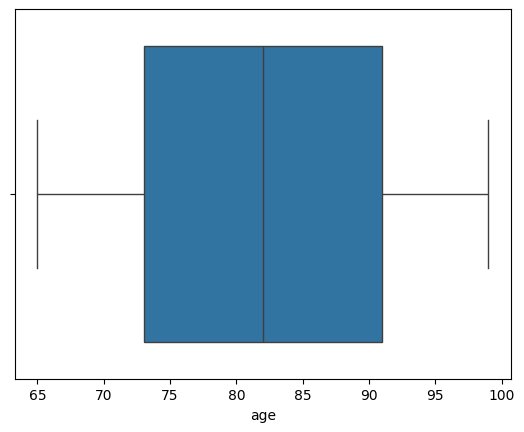

In [21]:
sns.boxplot(x='age', data=data)

In [22]:
data['age'].isna().sum()

np.int64(300000)

In [23]:
data['age'] = data['age'].fillna(data['age'].mean())

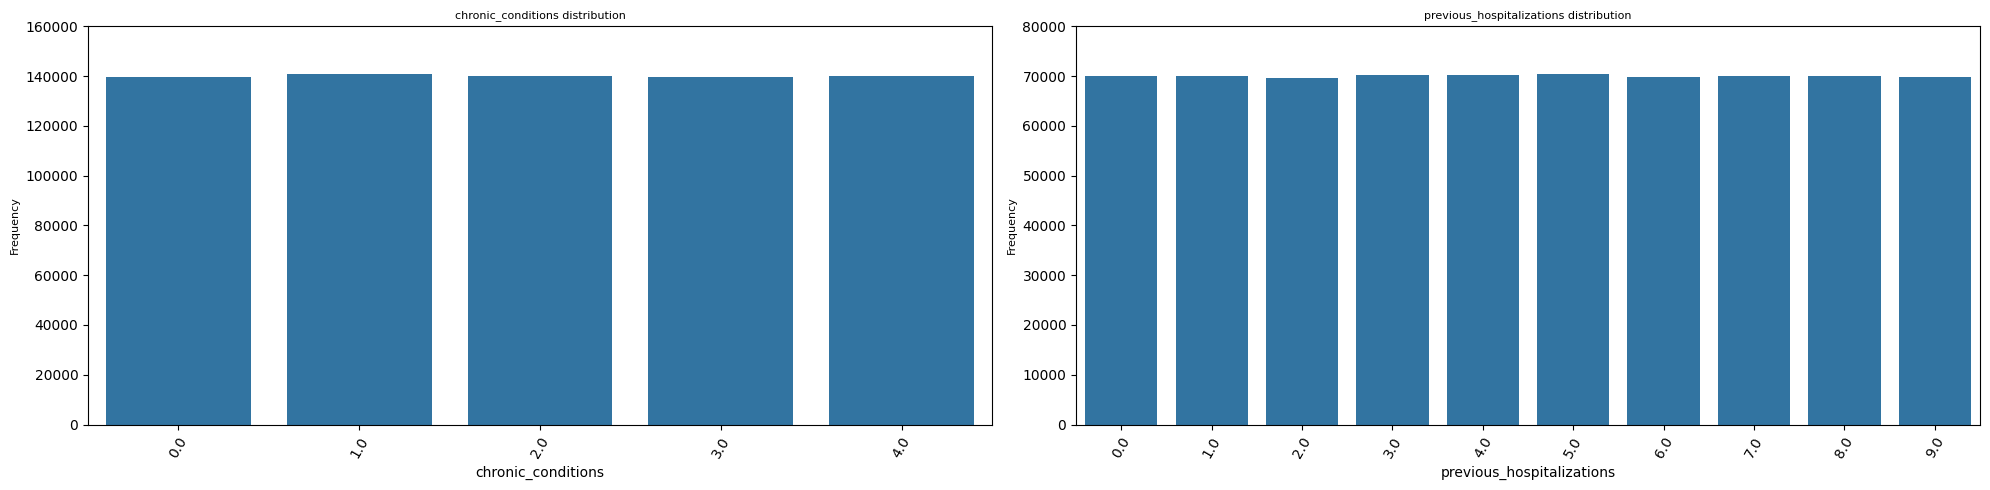

In [24]:
fig, ax = plt.subplots(nrows = 1, ncols=len(dis_cols), figsize = (20, 5))
for id, col in enumerate(dis_cols):
    sns.countplot(x = col, data=data, ax=ax[id])
    ax[id].set_yticks(ax[id].get_yticks())
    ax[id].tick_params(axis='y', labelsize=10)
    ax[id].tick_params(axis='x', labelsize=10, rotation=60)
    ax[id].set_title(f'{col} distribution', fontsize=8)
    ax[id].set_ylabel('Frequency', fontsize=8)

plt.tight_layout()

In [25]:
data[dis_cols].isna().sum()

chronic_conditions           300000
previous_hospitalizations    300000
dtype: int64

In [26]:
for col in dis_cols:
    modal_val = data[col].mode()[0]
    data[col] = data[col].fillna(modal_val)

In [27]:
data['readmitted_within_30_days'].value_counts(normalize=True)

readmitted_within_30_days
0    0.70034
1    0.29966
Name: proportion, dtype: float64

In [28]:
data.head()

,age,gender,chronic_conditions,previous_hospitalizations,mental_health_issues,polypharmacy,nutritional_status,follow_up_completed,care_plan_adherence,staffing_level,family_involvement,hospital_acquired_infections,discharge_timing,readmitted_within_30_days,admission_date
0,93.000000,0,1.0,8.0,0,1,0,1,0,0,0,1,0,0,2023-09-28
1,79.000000,0,2.0,7.0,1,1,0,0,0,0,1,0,0,0,2023-07-30
2,72.000000,0,0.0,5.0,0,0,0,0,0,0,1,0,1,0,2023-03-12
3,85.000000,1,1.0,5.0,0,1,2,1,0,0,2,0,0,0,2023-05-15
4,81.995246,1,1.0,3.0,0,0,1,0,0,0,1,0,1,1,2023-10-30


In [29]:
features = cat_cols + dis_cols + num_cols
target = 'readmitted_within_30_days'

In [30]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.35)

In [31]:
from sklearn.ensemble import RandomForestClassifier

rand = RandomForestClassifier( )
rand.fit(x_train, y_train)
print(f'Test score : {rand.score(x_test, y_test)}')
print(f'Train score : {rand.score(x_train, y_train)}')

Test score : 0.6430742857142857
Train score : 0.8284123076923077


In [32]:
from sklearn.tree import DecisionTreeClassifier

descision = DecisionTreeClassifier()
descision.fit(x_train, y_train)
print(f'Test score : {descision.score(x_test, y_test)}')
print(f'Train score : {descision.score(x_train, y_train)}')

Test score : 0.6273028571428572
Train score : 0.8284215384615384


In [33]:
from xgboost import XGBClassifier


xgm = XGBClassifier()
xgm.fit(x_train, y_train)
print(f'Test score : {xgm.score(x_test, y_test)}')
print(f'Train score : {xgm.score(x_train, y_train)}')

Test score : 0.6984171428571428
Train score : 0.7015092307692308


In [34]:
xgm = XGBClassifier(max_depth=5, gamma=1)
xgm.fit(x_train, y_train)
print(f'Test score : {xgm.score(x_test, y_test)}')
print(f'Train score : {xgm.score(x_train, y_train)}')

Test score : 0.6985628571428572
Train score : 0.701296923076923


In [35]:
df_1 = df.copy()

In [36]:
df = data.copy()

In [37]:
from sklearn.preprocessing import StandardScaler

stand = StandardScaler()
df[features] = stand.fit_transform(df[features])

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(df[features], df[target], test_size=0.35)

In [39]:


xgm.fit(X_train, Y_train)
print(f'Test score : {xgm.score(X_test, Y_test)}')
print(f'Train score : {xgm.score(X_train, Y_train)}')

Test score : 0.6996342857142858
Train score : 0.70072


In [40]:
from sklearn.preprocessing import MinMaxScaler

stand = MinMaxScaler()
df[features] = stand.fit_transform(df[features])
X_train, X_test, Y_train, Y_test = train_test_split(df[features], df[target], test_size=0.35)

In [41]:
xgm = XGBClassifier()
xgm.fit(X_train, Y_train)
print(f'Test score : {xgm.score(X_test, Y_test)}')
print(f'Train score : {xgm.score(X_train, Y_train)}')

Test score : 0.7002228571428571
Train score : 0.7005061538461539
